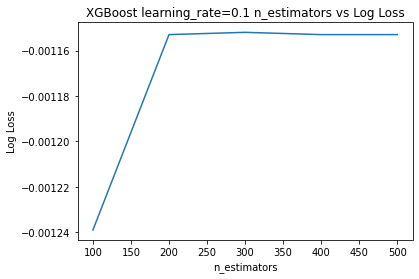

In [1]:
# Plot performance for learning_rate=0.1
from matplotlib import pyplot
n_estimators = [100, 200, 300, 400, 500]
loss = [-0.001239, -0.001153, -0.001152, -0.001153, -0.001153]
pyplot.plot(n_estimators, loss)
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.title('XGBoost learning_rate=0.1 n_estimators vs Log Loss')
pyplot.show()

In [2]:
# XGBoost on Otto dataset, Tune learning_rate
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot

# load data
data = read_csv('train.csv')
dataset = data.values

# split data into X and y
X = dataset[:,0:94]
y = dataset[:,94]

# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)

# grid search
model = XGBClassifier()
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(label_encoded_y, n_folds=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="log_loss", n_jobs=-1, cv=kfold)
result = grid_search.fit(X, label_encoded_y)

# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
    stdev = scores.std()
    means.append(mean_score)
    stdevs.append(stdev)
    print("%f (%f) with: %r" % (mean_score, stdev, params))
    
# plot
pyplot.errorbar(learning_rate, means, yerr=stdevs)
pyplot.title("XGBoost learning_rate vs Log Loss")
pyplot.xlabel('learning_rate')
pyplot.ylabel('Log Loss')
pyplot.savefig('learning_rate.png')

C:\Users\17809\AppData\Roaming\Python\Python38\site-packages\xgboost\compat.py:93: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  _numeric_index_types = (pd.Int64Index, pd.Float64Index, pd.UInt64Index)
C:\ProgramData\Anaconda3\lib\site-packages\dask\dataframe\utils.py:367: FutureWarning: pandas.UInt64Index is deprecated 

FileNotFoundError: [Errno 2] No such file or directory: 'train.csv'

In [ ]:
# XGBoost on Otto dataset, Tune learning_rate and n_estimators
from pandas import read_csv
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import matplotlib
matplotlib.use('Agg')
from matplotlib import pyplot
import numpy

# load data
data = read_csv('train.csv')
dataset = data.values

# split data into X and y
X = dataset[:,0:94]
y = dataset[:,94]

# encode string class values as integers
label_encoded_y = LabelEncoder().fit_transform(y)

# grid search
model = XGBClassifier()
n_estimators = [100, 200, 300, 400, 500]
learning_rate = [0.0001, 0.001, 0.01, 0.1]
param_grid = dict(learning_rate=learning_rate, n_estimators=n_estimators)
kfold = StratifiedKFold(label_encoded_y, n_folds=10, shuffle=True, random_state=7)
grid_search = GridSearchCV(model, param_grid, scoring="log_loss", n_jobs=-1, cv=kfold)
result = grid_search.fit(X, label_encoded_y)

# summarize results
print("Best: %f using %s" % (result.best_score_, result.best_params_))
means, stdevs = [], []
for params, mean_score, scores in result.grid_scores_:
    stdev = scores.std()
    means.append(mean_score)
    stdevs.append(stdev)
    print("%f (%f) with: %r" % (mean_score, stdev, params))
    
# plot results
scores = [x[1] for x in result.grid_scores_]
scores = numpy.array(scores).reshape(len(learning_rate), len(n_estimators))
for i, value in enumerate(learning_rate):
    pyplot.plot(n_estimators, scores[i], label='learning_rate: ' + str(value))
pyplot.legend()
pyplot.xlabel('n_estimators')
pyplot.ylabel('Log Loss')
pyplot.savefig('n_estimators_vs_learning_rate.png')